# CS512 (AI) Lab Assignment - 2

###**Due on: 8th Nov 2023 2400 Hrs | Total Marks: 100**

**Submission Instructions**:

All submission is through google classroom submitting the colab (.ipynb file). In case you face any trouble with the submission, please contact the TAs:

*   Sushil Ghildiyal sushil.20csz0021@iitrpr.ac.in
*   Surbhi Madan, surbhi.19csz0011@iitrpr.ac.in
*   Armaan Garg, armaan.19csz0002@iitrpr.ac.in
*   Kapil Rana, 2018csz0007@iitrpr.ac.in
*   Rahul Narava, syam.21csz0018@iitrpr.ac.in




Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.



**Penalty Policy**: Late submissions will attract penalties. There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. for 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.

All the plots and observations should be added to the colab notebook itself.

**Naming Convention**:

Name the colab file submission as follows: Name_rollnumber_Labnumber.ipynb
E.g. if your name is ABC, roll number is 2019csx1234 and submission is for assignment2 then you should name the colab file as: ABC_2019csx1234_Lab2.ipynb


# Q1: Gibbs Sampling

Consider a data set on the heights of 695 women and 562 men.
Suppose we have the list of heights, but we don’t know which data
points are from women and which are from men. The data points are available [here](https://drive.google.com/file/d/1_sweLfvqtqdy6oRuAKAG9Le3H-LWaFVK/view?usp=sharing).
The combined distribution of all 1257 heights is shown below.

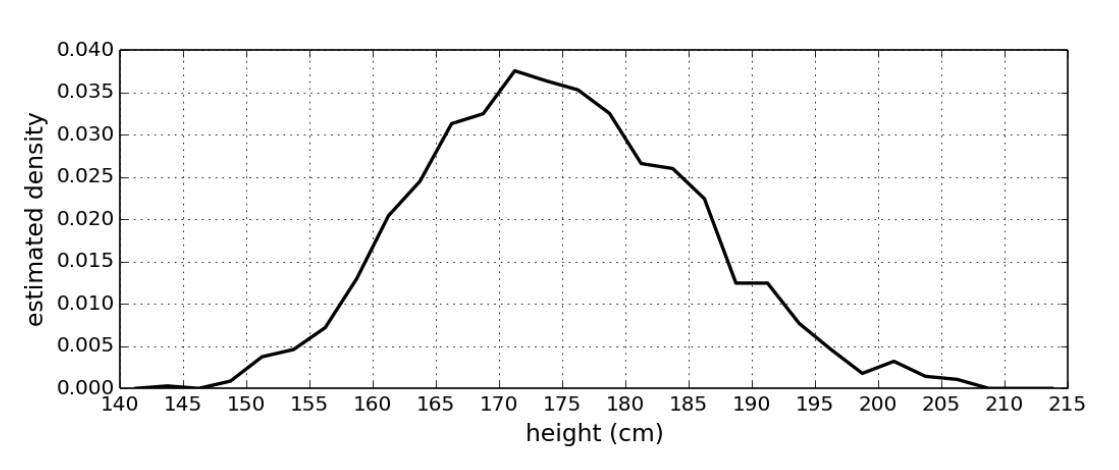

Consider that the combined height distribution is a two-component mixture of Normals, and there is an (essentially) unique set of mixture parameters
corresponding to each particular distribution.

To find individual distributions, let us consider a variable $Z_i$ that
indicates whether the subject i is female or male.
The mixture distribution can be specified as:

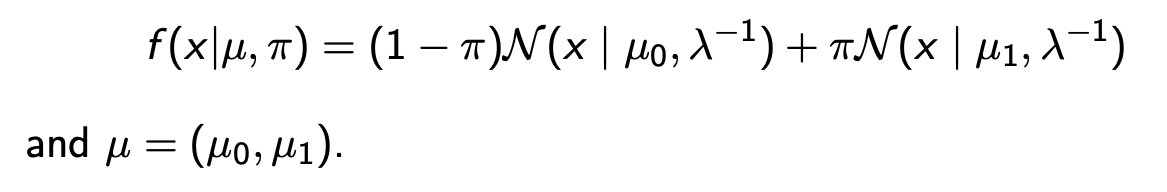

The full conditional distribution i.e. p($x_{1:n}$|µ, π) is a complicated function of µ and π, making the posterior difficult to sample from directly. Hence, we are going to use Gibbs sampling method to make our estimate for the individual components of the height gaussians.

The conditional distributions are specified as:

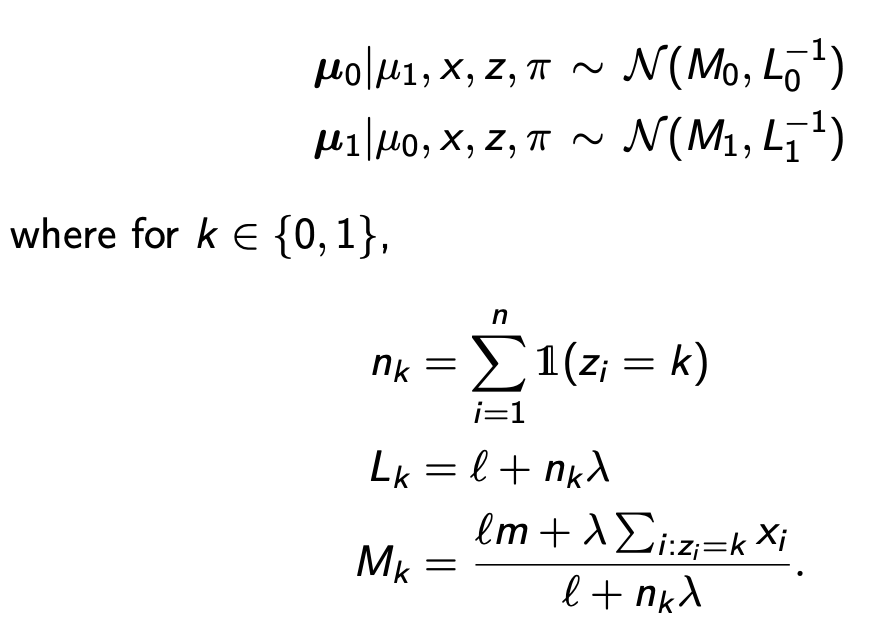

# $p(z|\mu, \pi, x)=$ 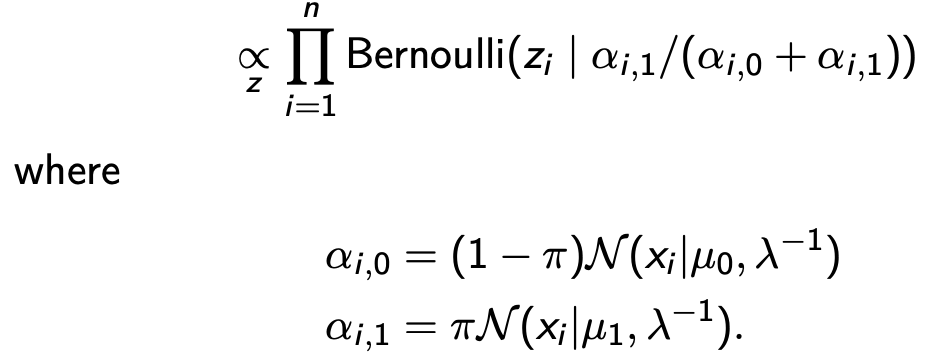

# $\pi = \frac{n_k}{n}$

The complete process can be specified as below:
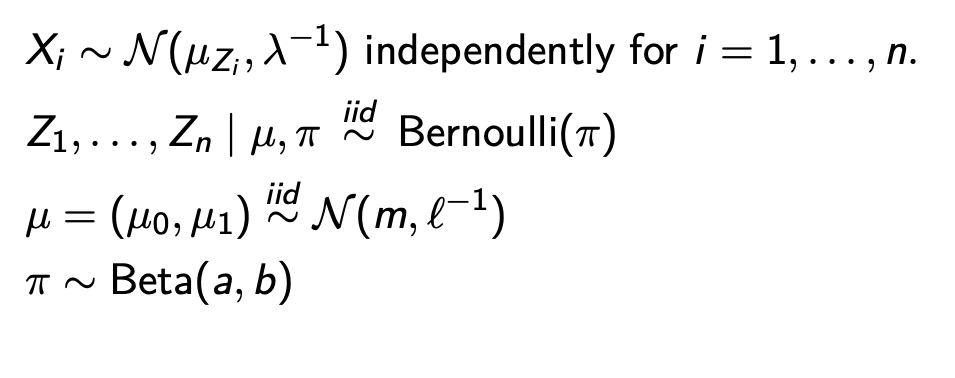

Consider the following initializations:

$\lambda = \frac{1}{\sigma^2}$ where $\sigma = 8$cm.

$m = 175 cm$

$l = \frac{1}{s^2}$ where $s = 15$cm.

a = 1, b = 1 (Beta parameters, equivalent to prior “sample
size” of 1 for each component)

$\pi = 0.5 $

$z_1, . . . , z_n$ are sampled i.i.d. from Bernoulli(1/2) (initial assignment
to components chosen uniformly at random)

$µ_0 = µ_1 = m$ (component means initialized to the mean of
their prior)

Q.1. Use a Gibbs Sampler given the conditionals and initializations provided above and plot the $µ_0, µ_1$ for 1000 samples. [10 marks]

Q.2. Plot the histograms of the heights of subjects assigned to each
component, according to $z_1, . . . , z_n$, in a typical sample after 1000 samples. [10 marks]

Q.3. Plot the $\pi$ for each iterations for both the components. [10 marks]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
iteration_num = 1000
sigma = 8
a = 1
b = 1
m = 175
s = 15
mu0 = m
mu1 = m
lamda = 1 / (sigma ** 2)
pi = 0.5

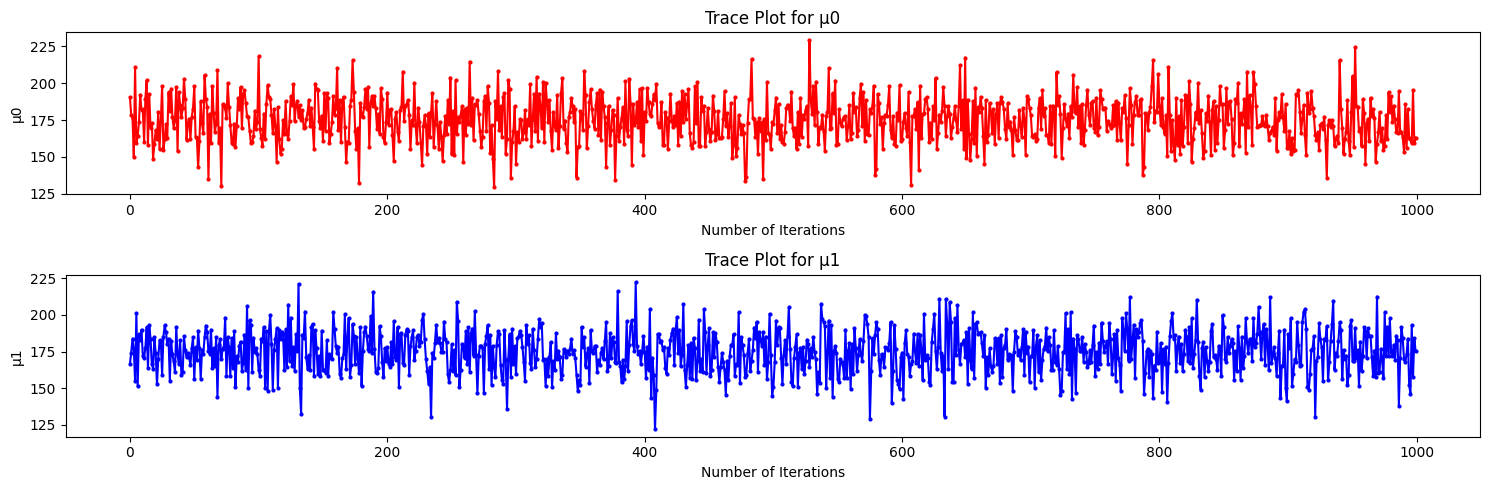

In [2]:

mu0_samples = []
mu1_samples = []

l_val_mu0 = 1 / (s ** 2)  # l
l_val_mu1 = 1 / (s ** 2)  # l
l = 1 / (s ** 2)

for _ in range(iteration_num):
    mu0mean = (l_val_mu0 * m + lamda *
                          np.sum(mu1_samples)) / (l + lamda * len(mu0_samples))
    mu1mean = (l_val_mu1 * m + lamda *
                          np.sum(mu0_samples)) / (l + lamda * len(mu1_samples))
    mu0 = np.random.normal(mu0mean, np.sqrt(s**2))
    mu0_samples.append(mu0)
    mu1 = np.random.normal(mu1mean, np.sqrt(s**2))
    mu1_samples.append(mu1)


plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.plot(mu0_samples, color='red', marker='o', linestyle='-', markersize=2)
plt.xlabel('Number of Iterations')
plt.ylabel('µ0')
plt.title('Trace Plot for µ0')
plt.subplot(2, 1, 2)
plt.plot(mu1_samples, color='blue', marker='o', linestyle='-', markersize=2)
plt.xlabel('Number of Iterations')
plt.ylabel('µ1')
plt.title('Trace Plot for µ1')
plt.tight_layout()
plt.show()


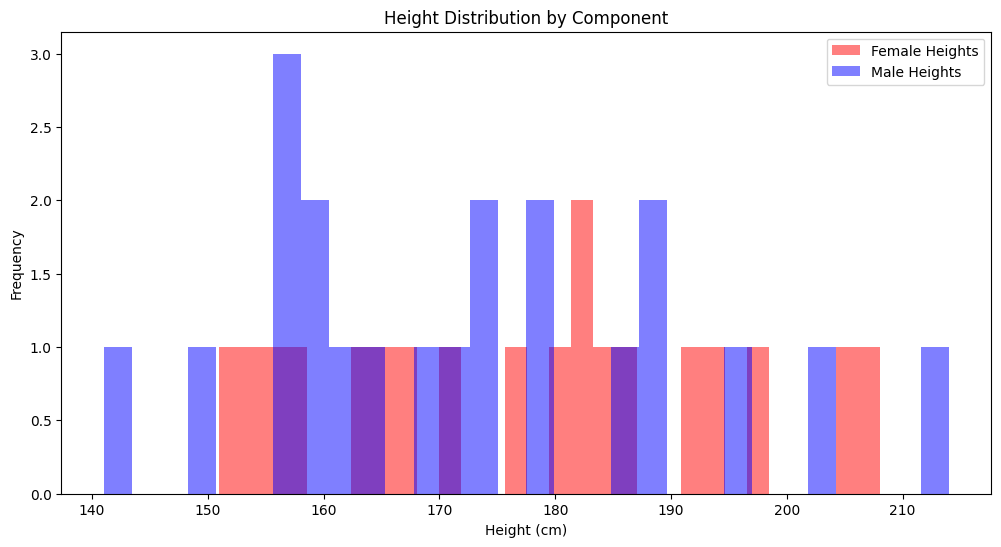

In [12]:
mu0_samples = []
mu1_samples = []
z_samples = []
l_val_mu0 = 1 / (s ** 2)
l_val_mu1 = 1 / (s ** 2)

with open("/content/data.txt", "r") as file:
    data = [float(line.split('\t')[1]) for line in file]
for _ in range(iteration_num):
    mu1mean = (l_val_mu1 * mu1 + sigma**2 * np.sum(
        mu0_samples)) / (l_val_mu1 + sigma**2 * len(mu0_samples))
    mu1 = np.random.normal(
        mu1mean, np.sqrt(l_val_mu1))
    mu1_samples.append(mu1)
    mu0mean = (l_val_mu0 * mu0 + sigma**2 * np.sum(
        mu1_samples)) / (l_val_mu0 + sigma**2 * len(mu1_samples))
    mu0 = np.random.normal(
        mu0mean, np.sqrt(l_val_mu0))
    mu0_samples.append(mu0)

    Pofz = 1 / (1 + np.exp(mu0 - mu1))
    z = np.random.binomial(1, Pofz, size=len(data))
    z_samples.append(z)
sampleformat = z_samples[-1]
f_hei = [data[i] for i in range(len(data)) if sampleformat[i] == 0]
m_hei = [data[i] for i in range(len(data)) if sampleformat[i] == 1]
plt.figure(figsize=(12, 6))
plt.hist(f_hei, bins=30, alpha=0.5,
         color='red', label='Female Heights')
plt.hist(m_hei, bins=30, alpha=0.5, color='blue', label='Male Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Height Distribution by Component')
plt.legend()
plt.show()


<Figure size 640x480 with 0 Axes>

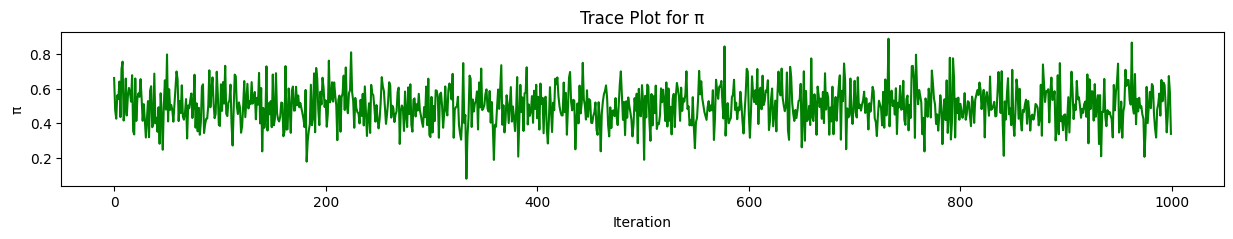

In [13]:

mu0_samples = []
mu1_samples = []
z_samples = []
pi_samples = []
z = np.random.binomial(1, 0.5, size=len(data))
for _ in range(iteration_num):
    suminv = np.sum(1 - z)
    sumnoninv = np.sum(z)
    lambda0 = s**2 / (suminv * lamda)
    lambda1 = s**2 / (sumnoninv * lamda)
    mu0 = np.random.normal((np.sum(data * (1 - z)) + lambda0 * m) /
                           (suminv + lambda0), np.sqrt(1 / (suminv + lambda0)))
    mu0_samples.append(mu0)
    mu1 = np.random.normal((np.sum(data * z) + lambda1 * m) /
                           (sumnoninv + lambda1), np.sqrt(1 / (sumnoninv + lambda1)))
    mu1_samples.append(mu1)

    Pofz = 1 / (1 + np.exp(mu0 - mu1))
    z = np.random.binomial(1, Pofz, size=len(data))
    z_samples.append(z)
    suminv = np.sum(1 - z)
    sumnoninv = np.sum(z)
    pi = np.random.beta(a + sumnoninv, b + suminv)
    pi_samples.append(pi)


plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 2))
plt.plot(pi_samples, color='green')
plt.xlabel('Iteration')
plt.ylabel('π')
plt.title('Trace Plot for π')
plt.show()


# Q2: Particle Filter Simulation for Robot Localization

A traveller needs to locate its beloved robot in an unkwown city, but luckly he has a tool that provides the data from the sensors of the robot, but the sensors are not perfect and can provide noisy measurements (the noise information is provided in the code below). Your task is to help the traveller by implementing a Particle Filter algorithm to accurately localize the zone of the robot within the city.


zone = [

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['2', '2', '2', '4', '4', '4', '4', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9']
]

environment = [

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E'],
    
    ['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']
]

In the give environment, 'S' denotes the location of the robot and W denotes walls.




**Transition function**

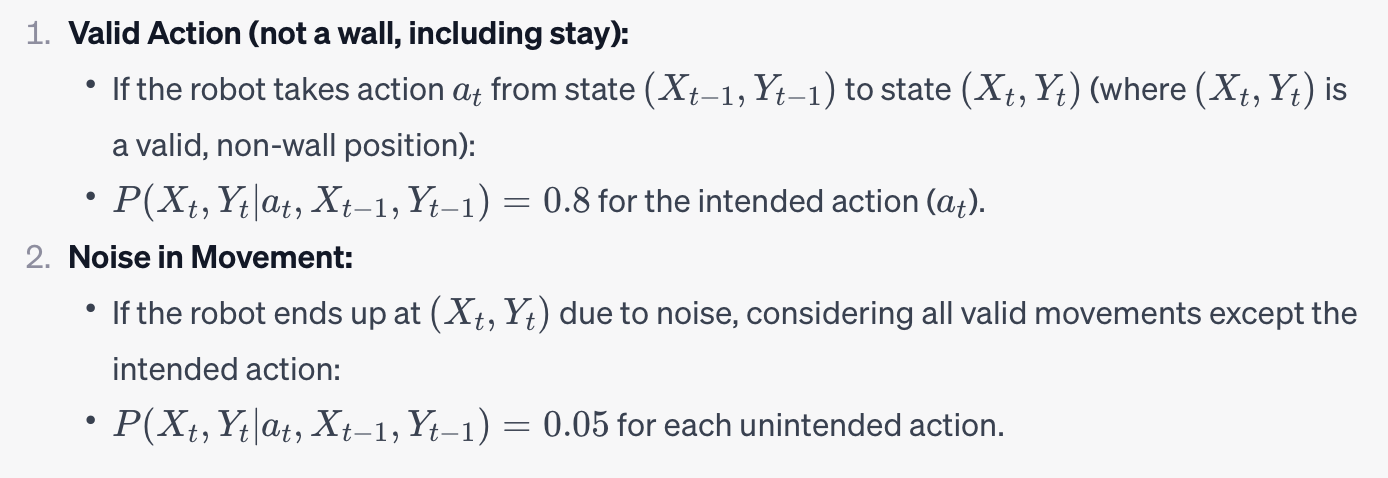

The observation probability P($z_t | x_t, y_t$) represents the probability of the sensor measurement $z_t$ given the true position $x_t, y_t$. The observation probability is 1 indicating that the sensor always detects the true state of the system without any errors, noise, or uncertainty.


**Wrtie a function for the random movement of the robot at each time-step where the action set is {N,S,E,W, stay} where each action is equally likely.**

**[PART 1]** Implement the Particle Filter algorithm (take 5 particles, randomly initialized at empty locations) to localize the robot by estimating its zone after every 10 iterations, till correct zone is located or upto max 100 iterations **[15 marks]**

**Note: Use the 8 neighbouring cells correspoding to the robot and each particle to measure their likehood.**

Example:

Robot (where S denotes the robot)

[E E E]

[W S W]

[E E E]


Particle (where P denotes the particle)

[E E E]

[W P E]

[E E E]

The likelihood of this particle being in the same zone as the robot is 7/8 as their is similarity of 7 neighbouring cells out of 8 based on the sensed infromation.


**[PART 2]** Heatmap: Create a heatmap of the grid where colors represent the probability or weight associated with different cells. Darker colors indicate higher probabilities, providing a visual representation of the confidence in different areas of the grid. **[15 marks]**

In [22]:
environment = [
    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'],
    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
    ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],
    ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],
    ['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E'],
    ['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E'],
    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E'],
    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E'],
    ['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']
]

zone = [

['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

['2', '2', '2', '4', '4', '4', '4', '8', '8', '8'],

['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

['2', '2', '2', '5', '5', '5', '5', '9', '9', '9'],

['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

['3', '3', '3', '6', '6', '6', '6', '9', '9', '9']
]


In [23]:
def random_movement(x, y, env_size):
    actions = [(0, 1), (0, -1), (1, 0), (-1, 0), (0, 0)]
    chosen_action = actions[np.random.choice(len(actions))]
    new_x = max(0, min(x + chosen_action[0], env_size[0] - 1))
    new_y = max(0, min(y + chosen_action[1], env_size[1] - 1))

    return new_x, new_y


environment_size = (len(environment), len(environment[0]))
current_position = (0, 7)


for _ in range(5):
    current_position = random_movement(
        current_position[0], current_position[1], environment_size)
    print(
        f"Current Position: {current_position}, Current Cell: {environment[current_position[0]][current_position[1]]}")


Current Position: (0, 8), Current Cell: E
Current Position: (0, 7), Current Cell: S
Current Position: (1, 7), Current Cell: E
Current Position: (1, 8), Current Cell: E
Current Position: (1, 8), Current Cell: E


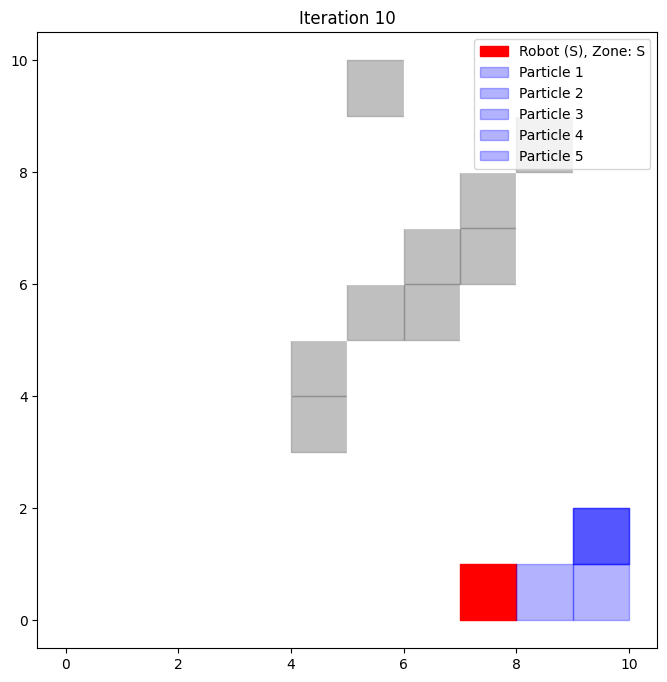

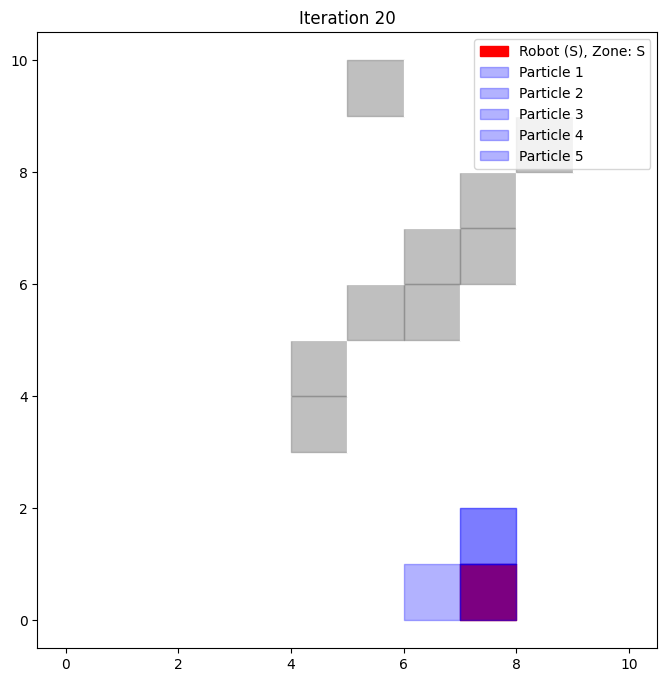

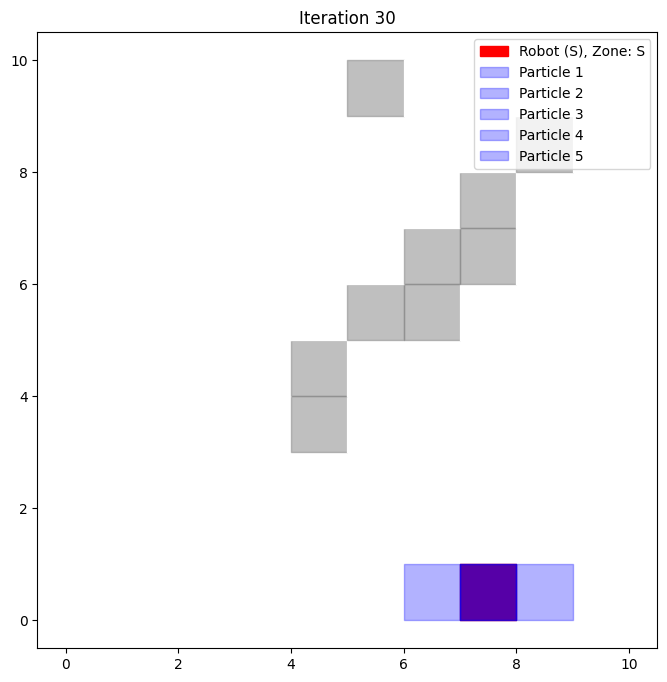

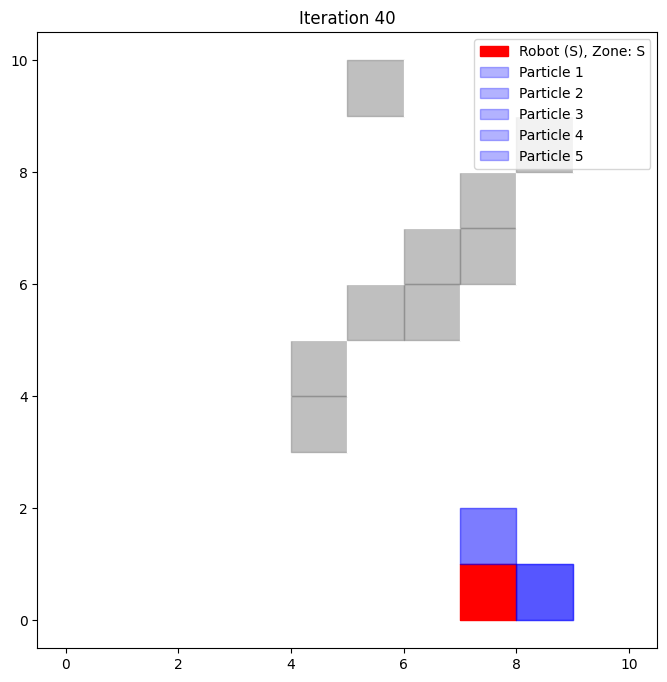

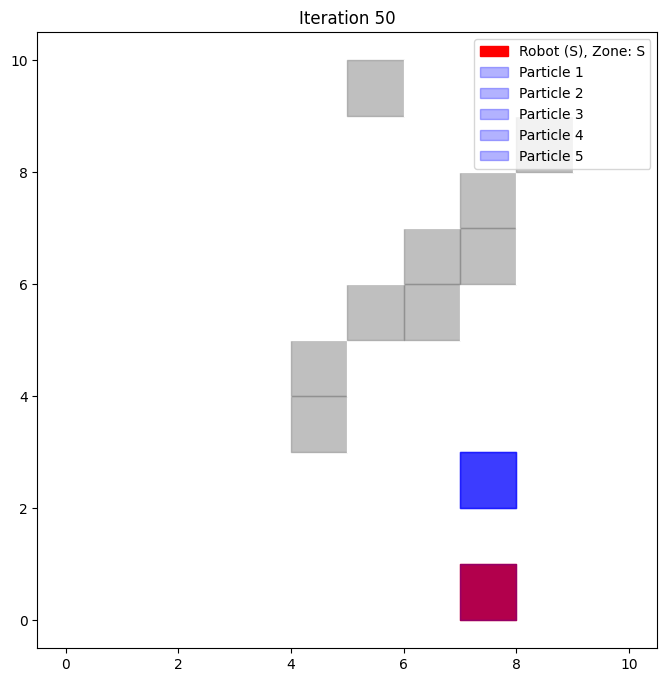

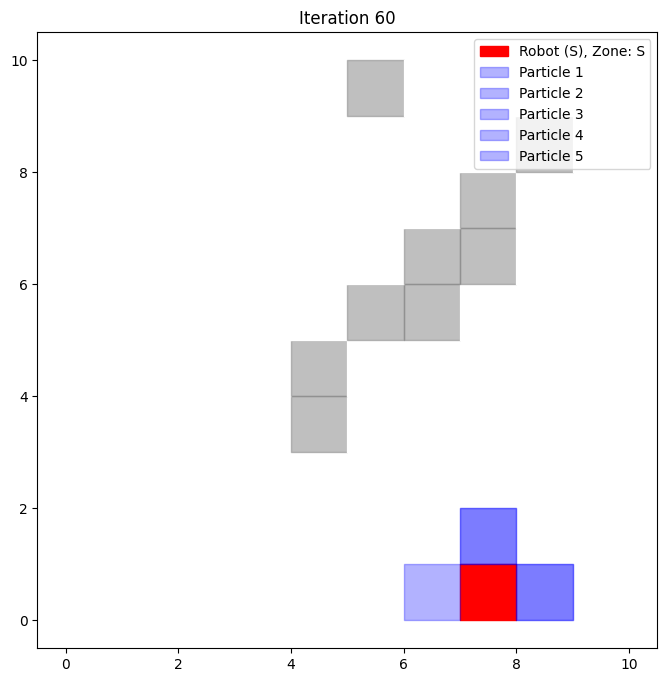

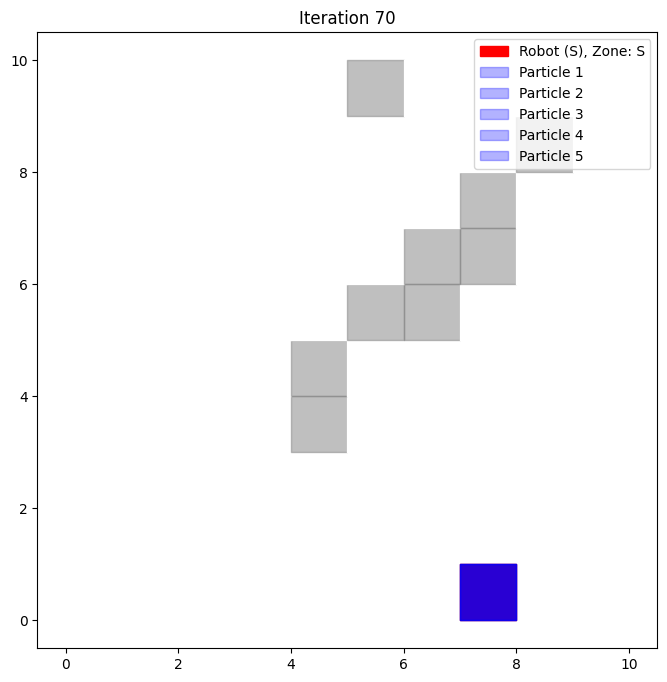

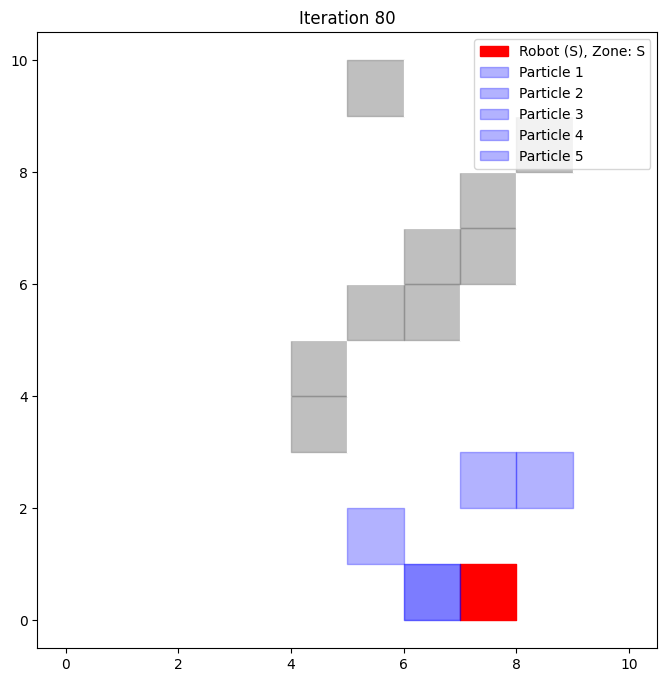

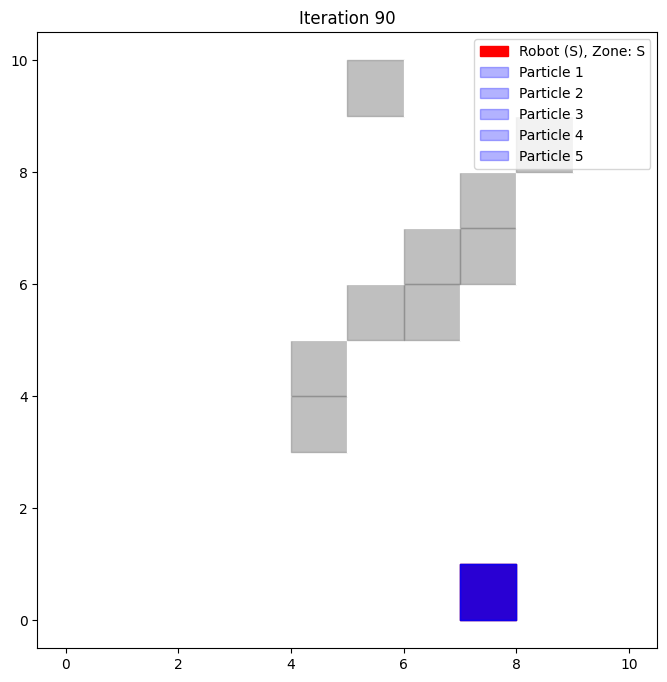

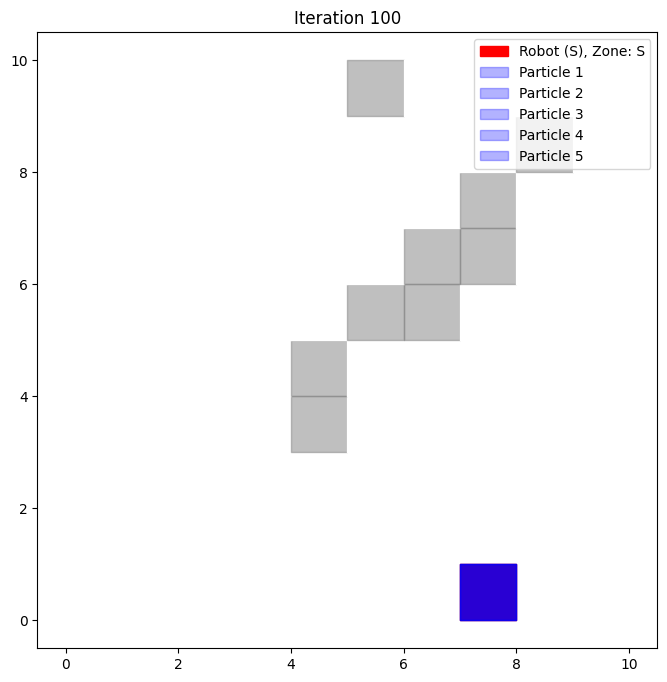

Max iterations reached. Zone not located.


In [24]:
import matplotlib.pyplot as plt
def calculate_likelihood(robot_position, particle_position):
    x, y = robot_position
    px, py = particle_position
    robot_neighbors = [(x + dx, y + dy) for dx in [-1, 0, 1] for dy in [-1, 0, 1] if (dx, dy) != (0, 0)]
    particle_neighbors = [(px + dx, py + dy) for dx in [-1, 0, 1] for dy in [-1, 0, 1] if (dx, dy) != (0, 0)]
    similarity = len(set(robot_neighbors) & set(particle_neighbors)) / 8.0
    return similarity

def plot_environment(robot_position, particle_positions, iteration, current_zone):
    plt.figure(figsize=(8, 8))
    for i in range(len(environment)):
        for j in range(len(environment[0])):
            if environment[i][j] == 'W':
                plt.fill_between([j, j + 1], i, i + 1, color='gray', alpha=0.5)
            elif environment[i][j] == 'E':
                plt.fill_between([j, j + 1], i, i + 1, color='white')
    plt.fill_between([robot_position[1], robot_position[1] + 1], robot_position[0], robot_position[0] + 1, color='red', label=f'Robot (S), Zone: {current_zone}')
    for idx, particle_position in enumerate(particle_positions):
        plt.fill_between([particle_position[1], particle_position[1] + 1], particle_position[0], particle_position[0] + 1, color='blue', alpha=0.3, label=f'Particle {idx + 1}')

    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.show()


def find_initial_robot_position(environment):
    for i, row in enumerate(environment):
        for j, cell in enumerate(row):
            if cell == 'S':
                return (i, j)
    return None

def particle_filter_localization(num_particles, max_iterations):
    robot_position = find_initial_robot_position(environment)
    if robot_position is None:
        print("Error: Initial position of the robot 'S' not found.")
        return None
    particles = [(np.random.randint(len(environment)), np.random.randint(len(environment[0]))) for _ in range(num_particles)]

    for iteration in range(1, max_iterations + 1):
        particles = [random_movement(px, py, (len(environment), len(environment[0]))) for px, py in particles]
        likelihoods = [calculate_likelihood(robot_position, particle_position) for particle_position in particles]
        if all(likelihood == 0 for likelihood in likelihoods):
            weights = np.ones(num_particles) / num_particles
        else:
            weights = np.array(likelihoods) / sum(likelihoods)
        indices = np.random.choice(np.arange(num_particles), size=num_particles, p=weights)
        particles = [particles[idx] for idx in indices]
        current_zone = environment[robot_position[0]][robot_position[1]]
        if iteration % 10 == 0:
            plot_environment(robot_position, particles, iteration, current_zone)
        if current_zone == zone[robot_position[0]][robot_position[1]]:
            print(f"Correct zone located at iteration {iteration}. Zone: {current_zone}")
            return current_zone
    print("Max iterations reached. Zone not located.")
    return None

num_particles = 5
max_iterations = 100

estimated_zone = particle_filter_localization(num_particles, max_iterations)
if estimated_zone is not None:
    print(f"Final estimated zone: {estimated_zone}")




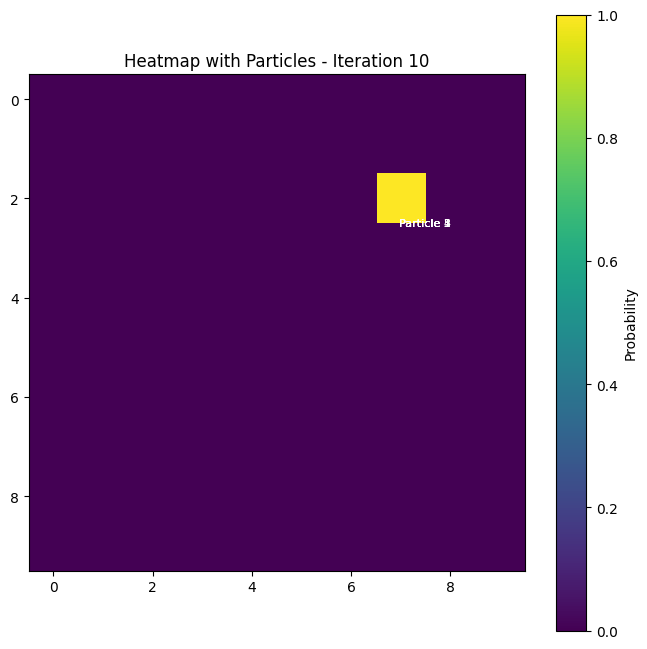

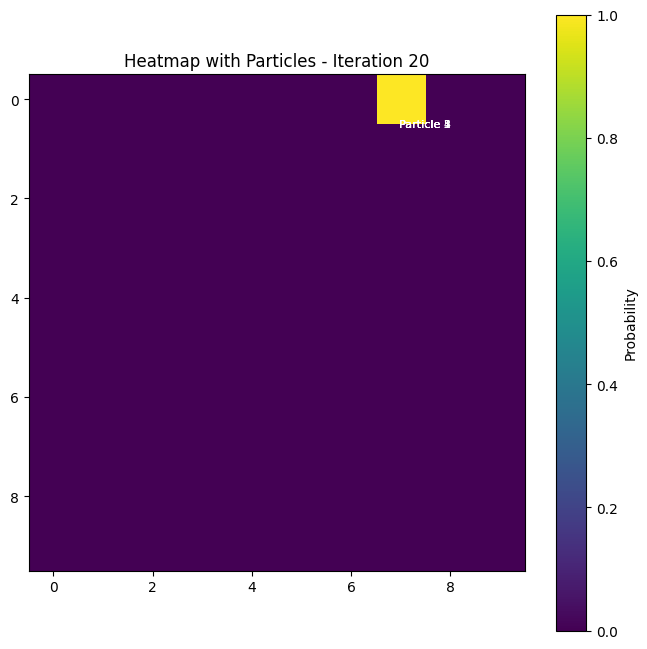

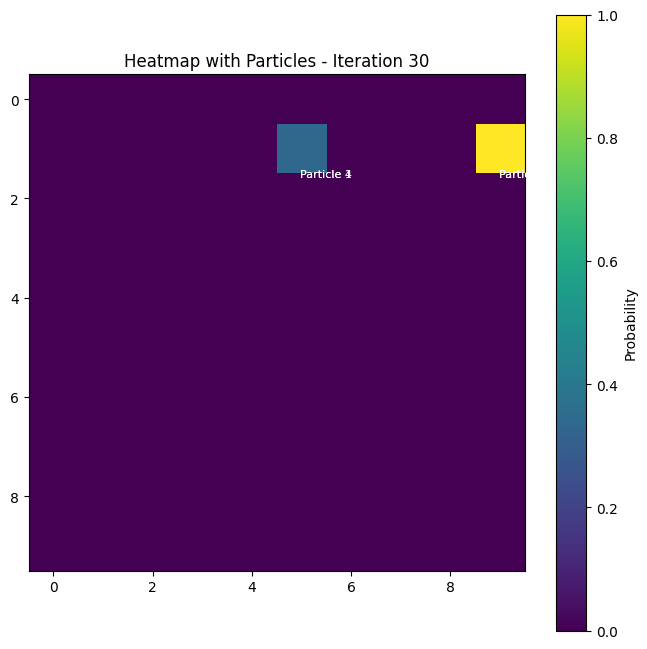

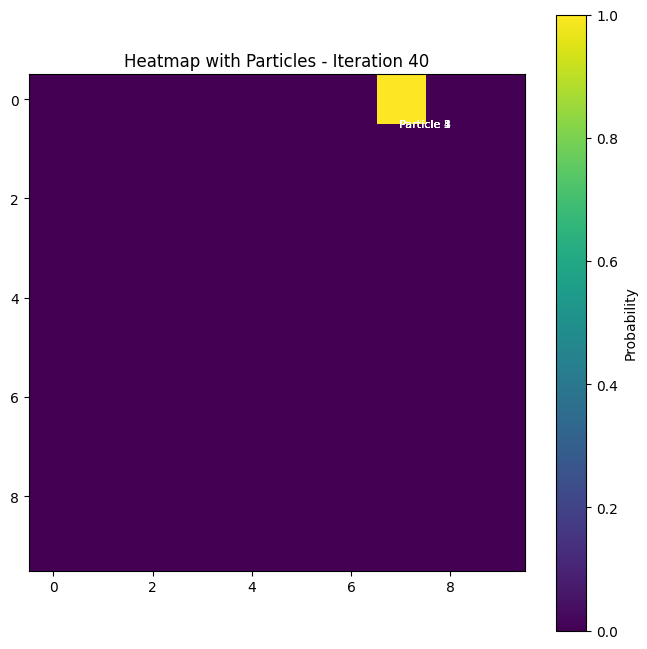

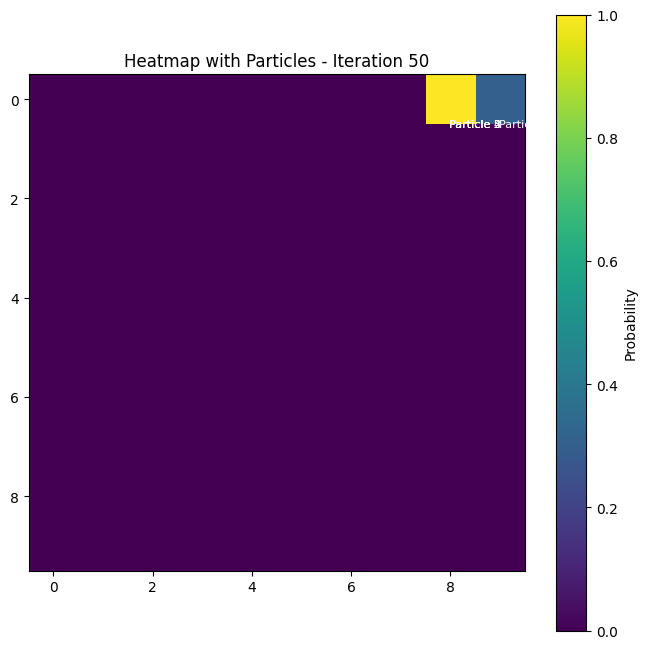

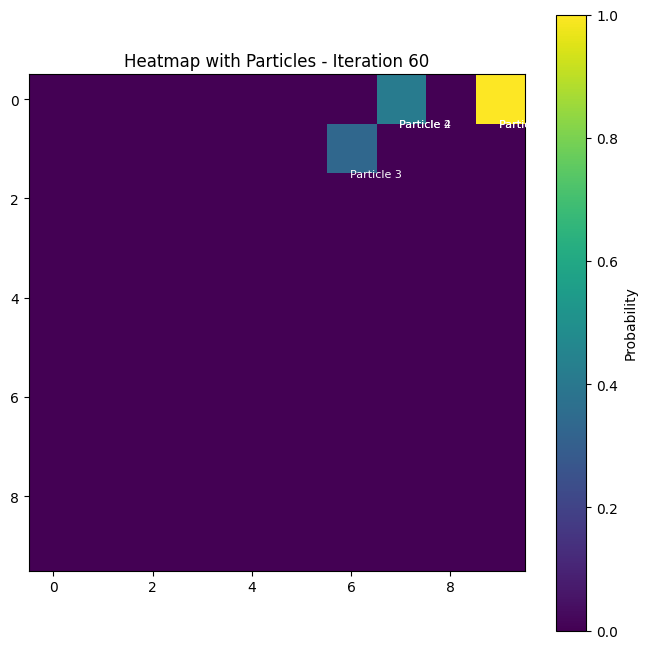

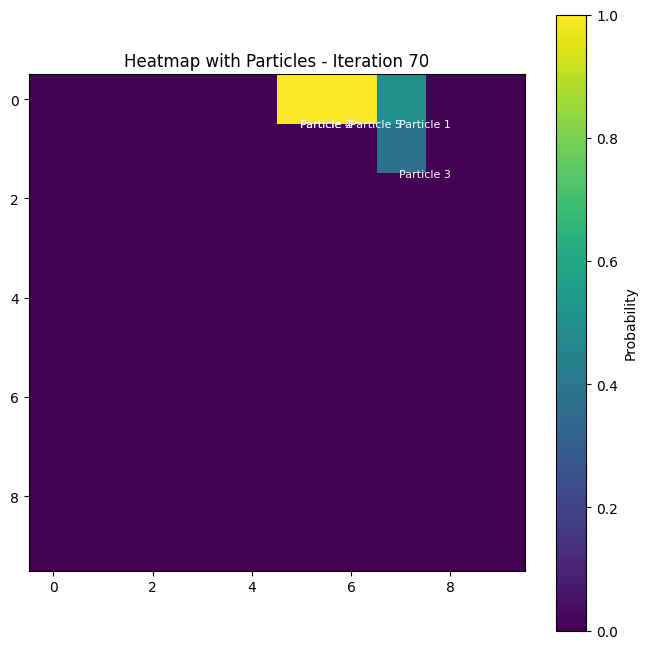

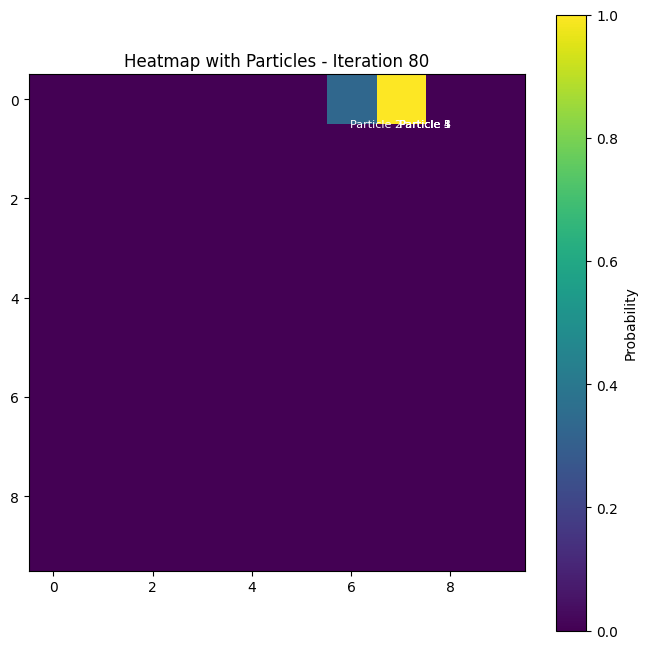

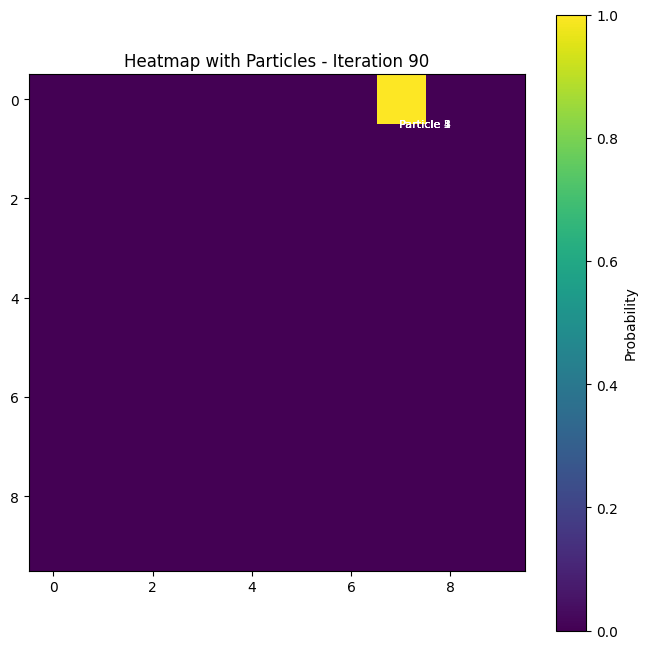

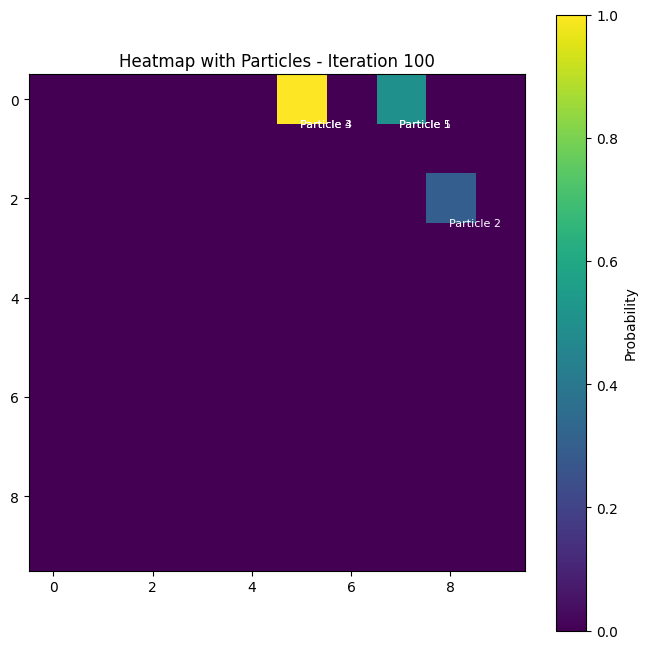

Max iterations reached. Zone not located.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def plot_heatmap_with_particles(environment, particles, weights, iteration):
    heatmap = np.zeros_like(environment, dtype=float)
    for particle, weight in zip(particles, weights):
        heatmap[particle[0], particle[1]] += weight
    heatmap /= np.max(heatmap)
    plt.figure(figsize=(8, 8))
    plt.imshow(heatmap, cmap='viridis', norm=Normalize(vmin=0, vmax=1))
    for idx, particle_position in enumerate(particles):
        plt.text(particle_position[1] + 0.5, particle_position[0] + 0.5, f'Particle {idx + 1}', color='white',
                 fontsize=8, ha='center', va='center')

    plt.colorbar(label='Probability')
    plt.title(f'Heatmap with Particles - Iteration {iteration}')
    plt.show()

def particle_filter_localization_with_heatmap(num_particles, max_iterations):
    particles = [(np.random.randint(len(environment)), np.random.randint(len(environment[0]))) for _ in range(num_particles)]
    robot_position = find_initial_robot_position(environment)
    for iteration in range(1, max_iterations + 1):
        particles = [random_movement(px, py, (len(environment), len(environment[0]))) for px, py in particles]
        likelihoods = [calculate_likelihood(robot_position, particle_position) for particle_position in particles]
        if all(likelihood == 0 for likelihood in likelihoods):
            weights = np.ones(num_particles) / num_particles
        else:
            weights = np.array(likelihoods) / sum(likelihoods)
        indices = np.random.choice(np.arange(num_particles), size=num_particles, p=weights)
        particles = [particles[idx] for idx in indices]
        if iteration % 10 == 0:
            plot_heatmap_with_particles(environment, particles, weights, iteration)
        if environment[robot_position[0]][robot_position[1]] == zone[robot_position[0]][robot_position[1]]:
            print(f"Correct zone located at iteration {iteration}")
            return zone[robot_position[0]][robot_position[1]]
    print("Max iterations reached. Zone not located.")
    return None

num_particles = 5
max_iterations = 100
particle_filter_localization_with_heatmap(num_particles, max_iterations)


# Question 3: X-Men MDP

Most of the X-Men are mutants, a subspecies of humans who are born with superhuman abilities activated by the "X-Gene". The X-Men fight for peace and equality between normal humans and mutants in a world where anti-mutant bigotry is fierce and widespread. They are led by Charles Xavier, also known as Professor X, a powerful mutant telepath who can control and read minds. Their archenemy is Magneto, a powerful mutant with the ability to manipulate and control magnetic fields who leads the Brotherhood of Mutants. Both have opposing views and philosophies regarding the relationship between mutants and humans. While the former works towards peace and understanding between mutants and humans, the latter views humans as a threat and believes in taking an aggressive approach against them.

Jean Grey is one of the most beloved X-Men. But when a mission goes wrong, Jean is exposed to a dark and ancient power. This power has destroyed everything it comes in contact with, until her. Now that this power is becoming unstable, she releases it with destruction and anger. Now that this foreign power is consuming her, and the world is threatened, the X-Men have to face an important truth: they must save either the world, or their friend who threatens it. Magneto calls her ‘The phoenix’ and intends to use her to declare war against humanity.

In this question, you will use some algorithms to compute optimal policies in Markov decision processes (MDP’s) to help wolverine escape from Magneto while trying to find Jean in order to kill her.

You are given the following grid world where Wolverine and other mutants from Xavier's School for Gifted Youngsters live along with Magneto and his brotherhood of mutants.




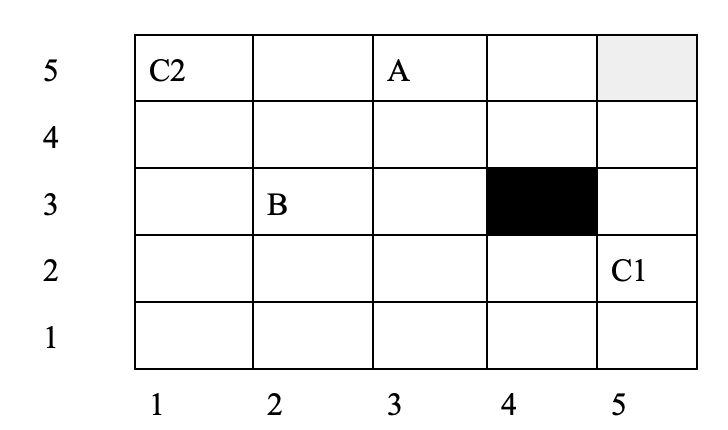

The wolverine (A) can occupy any of the 24 blank squares. The Magneto (B) also can occupy any square, except for square (5,5) which is Xavier’s school of Gifted Youngsters. Jean which can be at C1(5,2) or C2(1,5). Currently, she is at (5,2). Thus, MDP has 24*23*2 = 1104 states.

Wolverine and Magneto can each move one square in any direction - Up,down,left and right but not diagonal. They also can choose not to move at all. (4,3) is blocked due to the wall. Thus, there are 5 possible moves from each square. If an action is attempted that causes the characters(Wolverine and Magneto) to bump into a wall, then simply stay at the same location. In this problem, we will always take the point of view of the wolverine.

Reward Policies:

When Wolverine is at Jean’s place, it receives a reward of +20.
When Magneto is at Wolverine’s place, Wolverine receives a reward of -20.
When the Magneto is at wolverine’s place and wolverine is at jean’s place, the reward is -15.

All other configurations have a reward of 0.
Thus, the wolverine is trying to kill Jean while simultaneously avoiding the Magneto.

Jean is always available in exactly one of the two locations listed above. At every time step, Jean remains where she is with 80% probability. With 20% probability, Jean vanishes and reappears at another location.

States are encoded as six tuples, the first two numbers indicating the position of Magneto, the second two numbers the position of Wolverine, and the last two numbers the position of Jean. Thus, 2:3:3:5:5:2 indicates, as depicted in the figure above, that Magneto is in (2,3), Wolverine is in (3,5), and Jean is in (5,2). Magneto and wolverine take alternate moves. However, in encoding the MDP, we collapse both moves into a single state transition. In addition, Jean, when she moves, does so simultaneously with the wolverine's move. For instance, from the configuration above, if the wolverine moves to (2,5) and the Magneto responds by moving to (2,4), while jean moves to (1,5), this all would be encoded as a single transition from state 2:3:3:5:5:2 to 2:4:2:5:1:5.

The Wolverine and Magneto have 4 actions available ('UP', 'RIGHT', 'DOWN' and 'LEFT'). Each action moves the Wolverine/Magneto in its direction with probability 0.95. When the wolverine tries to move outside of the grid, the action will have no effect with probability 1. Staying in its own state will happen with probability 0.05.

We will consider two versions of Magneto:

In first version, Magneto is dumb and lazy, simply wanders randomly around its environment choosing randomly among its available actions at every step.
In the second version, Magneto is intelligent and active. Here, Magneto always heads straight for wolverine following the shortest path possible. Thus, after wolverine makes its move, Magneto chooses the action that will move it as close as possible to the wolverine's new position. (If there is a tie among the Magneto's best available options, the Magneto chooses randomly among these equally good best actions.)
    
For both versions of Magneto, your job will be to compute the wolverine's optimal policy, i.e. the action that should be taken at each state to maximize the wolverine's expected discounted reward, where we fix the discount factor (gamma) to be 0.85.

**Task 1:** Implement value iteration for both versions of Magneto on MDP [10 points]

**Task 2:** Implement policy iteration for both versions of Magneto [10 points]

**Task 3:** Implement and visualize the MDP board and strategy (policy) graphically [10 points]

**Task 4:** Compare the results for all the four approaches - Value iteration for lazy Magneto, Value iteration for active Magneto, Policy iteration for lazy Magneto, Policy iteration for active Magneto with proper tables/graphs/statistics. Comment which one is best among all the four mentioned approaches. [10 points]



In [18]:
import numpy as np


def is_valid(state):
    magneto_pos = state[:2]
    wolverine_pos = state[2:4]
    jean_pos = state[4:]
    jean_at_C1 = jean_pos == (5, 2)
    jean_at_C2 = jean_pos == (1, 5)

    return (0 <= magneto_pos[0] < 5 and 0 <= magneto_pos[1] < 5 and
            0 <= wolverine_pos[0] < 5 and 0 <= wolverine_pos[1] < 5 and
            ((jean_at_C1 or jean_at_C2) and wolverine_pos != (4, 3)))


def get_next_state(current_state, action, magneto_version):
    magneto_actions = ['UP', 'RIGHT', 'DOWN', 'LEFT']
    jean_movement = np.random.choice(
        [current_state[4:], (np.random.randint(5), np.random.randint(5))], p=[0.8, 0.2])
    wolverine_pos = current_state[2:4]
    if action == 'UP':
        wolverine_pos = (max(0, wolverine_pos[0] - 1), wolverine_pos[1])
    elif action == 'RIGHT':
        wolverine_pos = (wolverine_pos[0], min(4, wolverine_pos[1] + 1))
    elif action == 'DOWN':
        wolverine_pos = (min(4, wolverine_pos[0] + 1), wolverine_pos[1])
    elif action == 'LEFT':
        wolverine_pos = (wolverine_pos[0], max(0, wolverine_pos[1] - 1))
    magneto_pos = current_state[:2]
    if magneto_version == 'DUMB':
        magneto_action = np.random.choice(magneto_actions)
    elif magneto_version == 'INTELLIGENT':
        magneto_action = min(magneto_actions, key=lambda a: np.linalg.norm(np.array(magneto_pos) - np.array(wolverine_pos) -
                                                                           np.array([1 if a == 'DOWN' else 0 if a == 'UP' else 0,
                                                                                    1 if a == 'RIGHT' else 0 if a == 'LEFT' else 0])))

    if magneto_action == 'UP':
        magneto_pos = (max(0, magneto_pos[0] - 1), magneto_pos[1])
    elif magneto_action == 'RIGHT':
        magneto_pos = (magneto_pos[0], min(4, magneto_pos[1] + 1))
    elif magneto_action == 'DOWN':
        magneto_pos = (min(4, magneto_pos[0] + 1), magneto_pos[1])
    elif magneto_action == 'LEFT':
        magneto_pos = (magneto_pos[0], max(0, magneto_pos[1] - 1))
    next_state = magneto_pos + wolverine_pos + jean_movement
    if is_valid(next_state):
        return next_state
    else:
        return current_state


def value_iteration(magneto_version, gamma=0.85, epsilon=1e-6):
    states = [(i, j, k, l, m, n) for i in range(5) for j in range(5) for k in range(
        5) for l in range(5) for m in range(5) for n in [(5, 2), (1, 5)]]
    V = {state: 0 for state in states}
    actions = ['UP', 'RIGHT', 'DOWN', 'LEFT']
    iteration = 0  # debugging
    while True:
        delta = 0
        for state in states:
            if is_valid(state):
                v = V[state]
                new_v = 0
                for action in actions:
                    next_state = get_next_state(state, action, magneto_version)
                    reward = 0
                    if next_state[2:4] == next_state[4:6]:
                        reward += 20  # W  at J's place
                    if next_state[:2] == next_state[2:4]:
                        reward -= 20  # M  at W's place
                    if next_state[:2] == next_state[4:6]:
                        reward -= 15  # M at W's place and W at J's place

                    new_v += 0.95 * (reward + gamma * V[next_state])
                new_v += 0.05 * V[state]
                V[state] = new_v
                delta = max(delta, abs(v - new_v))

        if iteration % 10 == 0:
            print(f"Iteration: {iteration}, Delta: {delta}")

        if delta < epsilon:
            break

        iteration += 1
    policy = {}
    for state in states:
        if is_valid(state):
            best_action = None
            best_value = float('-inf')
            for action in actions:
                next_state = get_next_state(state, action, magneto_version)
                reward = 0
                if next_state[2:4] == next_state[4:6]:
                    reward += 20
                if next_state[:2] == next_state[2:4]:
                    reward -= 20
                if next_state[:2] == next_state[4:6]:
                    reward -= 15
                value = 0.95 * (reward + gamma *
                                V[next_state]) + 0.05 * V[state]
                if value > best_value:
                    best_value = value
                    best_action = action
            policy[state] = best_action

    return policy


def policy_iteration(magneto_version, gamma=0.85):
    states = [(i, j, k, l, m, n) for i in range(5) for j in range(5) for k in range(
        5) for l in range(5) for m in range(5) for n in [(5, 2), (1, 5)]]
    policy = {state: np.random.choice(
        ['UP', 'RIGHT', 'DOWN', 'LEFT']) for state in states}
    V = {state: 0 for state in states}
    actions = ['UP', 'RIGHT', 'DOWN', 'LEFT']
    while True:
        while True:
            delta = 0
            for state in states:
                if is_valid(state):
                    v = V[state]
                    action = policy[state]
                    next_state = get_next_state(state, action, magneto_version)
                    reward = 0
                    if next_state[2:4] == next_state[4:6]:
                        reward += 20
                    if next_state[:2] == next_state[2:4]:
                        reward -= 20
                    if next_state[:2] == next_state[4:6]:
                        reward -= 15
                    V[state] = 0.95 * (reward + gamma *
                                       V[next_state]) + 0.05 * V[state]
                    delta = max(delta, abs(v - V[state]))
            if delta < 1e-6:
                break
        policy_stable = True
        for state in states:
            if is_valid(state):
                old_action = policy[state]
                best_action = None
                best_value = float('-inf')
                for action in actions:
                    next_state = get_next_state(state, action, magneto_version)
                    reward = 0
                    if next_state[2:4] == next_state[4:6]:
                        reward += 20
                    if next_state[:2] == next_state[2:4]:
                        reward -= 20
                    if next_state[:2] == next_state[4:6]:
                        reward -= 15
                    value = 0.95 * (reward + gamma *
                                    V[next_state]) + 0.05 * V[state]
                    if value > best_value:
                        best_value = value
                        best_action = action
                policy[state] = best_action
                if old_action != best_action:
                    policy_stable = False
                print(
                    f"Current State: {state}, Old Action: {old_action}, New Action: {best_action}")

        if policy_stable:
            break

    return policy


policy_dumb_value_iteration = value_iteration('DUMB')
policy_intelligent_value_iteration = value_iteration('INTELLIGENT')

policy_dumb_policy_iteration = policy_iteration('DUMB')
policy_intelligent_policy_iteration = policy_iteration('INTELLIGENT')


def print_policy(policy):
    for state, action in policy.items():
        print(f"State: {state}, Action: {action}")


print("Dumb Magneto - Value Iteration Policy:")
print_policy(policy_dumb_value_iteration)


Iteration: 0, Delta: 0
Iteration: 0, Delta: 0
Dumb Magneto - Value Iteration Policy:


In [3]:
print("\nIntelligent Magneto - Value Iteration Policy:")
print_policy(policy_intelligent_value_iteration)



Intelligent Magneto - Value Iteration Policy:


In [4]:

print("\nDumb Magneto - Policy Iteration Policy:")
print_policy(policy_dumb_policy_iteration)


Streaming output truncated to the last 5000 lines.
State: (1, 0, 0, 0, 0, (5, 2)), Action: LEFT
State: (1, 0, 0, 0, 0, (1, 5)), Action: RIGHT
State: (1, 0, 0, 0, 1, (5, 2)), Action: UP
State: (1, 0, 0, 0, 1, (1, 5)), Action: RIGHT
State: (1, 0, 0, 0, 2, (5, 2)), Action: UP
State: (1, 0, 0, 0, 2, (1, 5)), Action: LEFT
State: (1, 0, 0, 0, 3, (5, 2)), Action: LEFT
State: (1, 0, 0, 0, 3, (1, 5)), Action: UP
State: (1, 0, 0, 0, 4, (5, 2)), Action: RIGHT
State: (1, 0, 0, 0, 4, (1, 5)), Action: RIGHT
State: (1, 0, 0, 1, 0, (5, 2)), Action: RIGHT
State: (1, 0, 0, 1, 0, (1, 5)), Action: DOWN
State: (1, 0, 0, 1, 1, (5, 2)), Action: LEFT
State: (1, 0, 0, 1, 1, (1, 5)), Action: UP
State: (1, 0, 0, 1, 2, (5, 2)), Action: RIGHT
State: (1, 0, 0, 1, 2, (1, 5)), Action: DOWN
State: (1, 0, 0, 1, 3, (5, 2)), Action: LEFT
State: (1, 0, 0, 1, 3, (1, 5)), Action: UP
State: (1, 0, 0, 1, 4, (5, 2)), Action: DOWN
State: (1, 0, 0, 1, 4, (1, 5)), Action: LEFT
State: (1, 0, 0, 2, 0, (5, 2)), Action: DOWN
State: (

In [5]:
print("\nIntelligent Magneto - Policy Iteration Policy:")
print_policy(policy_intelligent_policy_iteration)

Streaming output truncated to the last 5000 lines.
State: (1, 0, 0, 0, 0, (5, 2)), Action: UP
State: (1, 0, 0, 0, 0, (1, 5)), Action: DOWN
State: (1, 0, 0, 0, 1, (5, 2)), Action: RIGHT
State: (1, 0, 0, 0, 1, (1, 5)), Action: RIGHT
State: (1, 0, 0, 0, 2, (5, 2)), Action: UP
State: (1, 0, 0, 0, 2, (1, 5)), Action: UP
State: (1, 0, 0, 0, 3, (5, 2)), Action: DOWN
State: (1, 0, 0, 0, 3, (1, 5)), Action: DOWN
State: (1, 0, 0, 0, 4, (5, 2)), Action: RIGHT
State: (1, 0, 0, 0, 4, (1, 5)), Action: RIGHT
State: (1, 0, 0, 1, 0, (5, 2)), Action: LEFT
State: (1, 0, 0, 1, 0, (1, 5)), Action: DOWN
State: (1, 0, 0, 1, 1, (5, 2)), Action: UP
State: (1, 0, 0, 1, 1, (1, 5)), Action: UP
State: (1, 0, 0, 1, 2, (5, 2)), Action: UP
State: (1, 0, 0, 1, 2, (1, 5)), Action: UP
State: (1, 0, 0, 1, 3, (5, 2)), Action: RIGHT
State: (1, 0, 0, 1, 3, (1, 5)), Action: DOWN
State: (1, 0, 0, 1, 4, (5, 2)), Action: RIGHT
State: (1, 0, 0, 1, 4, (1, 5)), Action: DOWN
State: (1, 0, 0, 2, 0, (5, 2)), Action: LEFT
State: (1, 0

In [17]:
def display_policy(policy):
    rows, cols = 5, 5
    symbols = {
        'UP': '↑',
        'DOWN': '↓',
        'LEFT': '←',
        'RIGHT': '→',
        'STAY': '•'
    }
    for i in range(rows):
        for j in range(cols):
            state = (i, j, 0, 0, 0, (5, 2))
            if state in policy:
                action = policy[state]
                print(f"{symbols[action]:<5}", end=" | ")
            else:
                print("INVALID", end=" | ")
        print()


print("Dumb Magneto - Value Iteration Policy:")
display_policy(policy_dumb_value_iteration)
print("\nIntelligent Magneto - Value Iteration Policy:")
display_policy(policy_intelligent_value_iteration)
print("\nDumb Magneto - Policy Iteration Policy:")
display_policy(policy_dumb_policy_iteration)
print("\nIntelligent Magneto - Policy Iteration Policy:")
display_policy(policy_intelligent_policy_iteration)


Dumb Magneto - Value Iteration Policy:
INVALID | INVALID | INVALID | INVALID | INVALID | 
INVALID | INVALID | INVALID | INVALID | INVALID | 
INVALID | INVALID | INVALID | INVALID | INVALID | 
INVALID | INVALID | INVALID | INVALID | INVALID | 
INVALID | INVALID | INVALID | INVALID | INVALID | 

Intelligent Magneto - Value Iteration Policy:
INVALID | INVALID | INVALID | INVALID | INVALID | 
INVALID | INVALID | INVALID | INVALID | INVALID | 
INVALID | INVALID | INVALID | INVALID | INVALID | 
INVALID | INVALID | INVALID | INVALID | INVALID | 
INVALID | INVALID | INVALID | INVALID | INVALID | 

Dumb Magneto - Policy Iteration Policy:
↓     | ↑     | →     | ↑     | ↑     | 
←     | ↑     | →     | ←     | ←     | 
←     | →     | ↑     | →     | ↑     | 
↓     | ←     | ↓     | ←     | ↑     | 
↓     | ←     | ↑     | ↓     | ←     | 

Intelligent Magneto - Policy Iteration Policy:
←     | ↑     | ↑     | →     | →     | 
↑     | →     | →     | ↓     | →     | 
↑     | →     | ←     | ←   

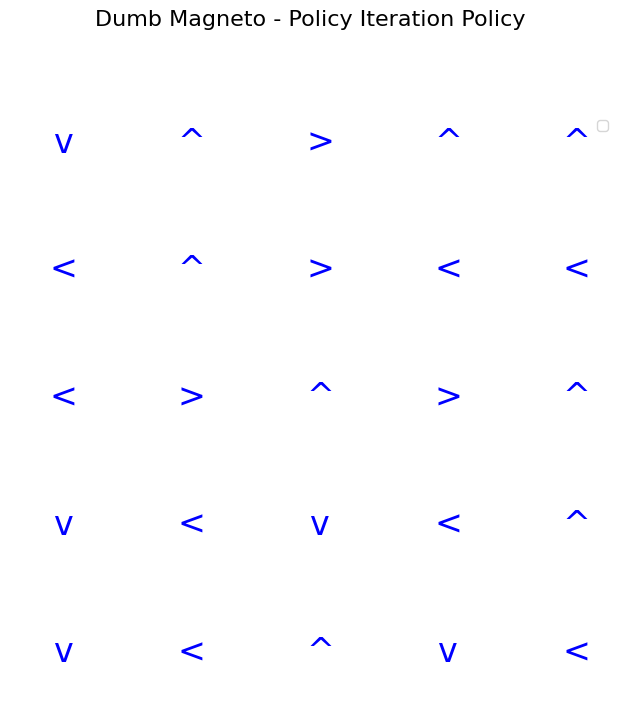

In [16]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_mdp(states, policy, title):
    rows, cols = 5, 5
    symbols = {'UP': '^', 'RIGHT': '>', 'DOWN': 'v', 'LEFT': '<'}
    fig, ax = plt.subplots(rows, cols, figsize=(8, 8))
    fig.suptitle(title, fontsize=16)
    for i in range(rows):
        for j in range(cols):
            state = (i, j, 0, 0, 0, (5, 2))
            action = policy[state]
            ax[i, j].text(0.5, 0.5, symbols[action], fontsize=24,
                          ha='center', va='center', color='blue')
            ax[i, j].axis('off')
            ax[i, j].grid(color='black', linestyle='-', linewidth=0.5)
            ax[i, j].xaxis.set_minor_locator(plt.MultipleLocator(0.5))
            ax[i, j].yaxis.set_minor_locator(plt.MultipleLocator(0.5))
    legend_labels = [f'{action}: {symbols[action]}' for action in symbols]
    fig.legend(legend_labels, loc='upper left', bbox_to_anchor=(0.85, 0.85))
    plt.show()


states = [(i, j, k, l, m, n) for i in range(5) for j in range(5) for k in range(
    5) for l in range(5) for m in range(5) for n in [(5, 2), (1, 5)]]
visualize_mdp(states, policy_dumb_policy_iteration,
              "Dumb Magneto - Policy Iteration Policy")


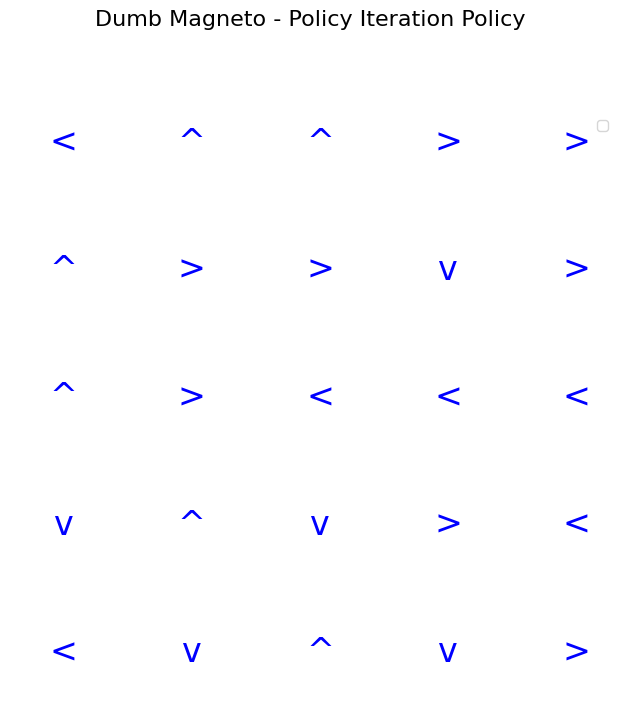

In [8]:
visualize_mdp(states, policy_intelligent_policy_iteration, "Dumb Magneto - Policy Iteration Policy")


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def get_next_state(current_state, action, magneto_version):
    magneto_actions = ['UP', 'RIGHT', 'DOWN', 'LEFT']

    jean_movement = None
    if np.random.uniform() < 0.8:
        jean_movement = current_state[4:]
    else:
        jean_movement = (np.random.randint(5), np.random.randint(5))

    wolverine_pos = current_state[2:4]

    if action == 'UP':
        wolverine_pos = (max(0, wolverine_pos[0] - 1), wolverine_pos[1])
    elif action == 'RIGHT':
        wolverine_pos = (wolverine_pos[0], min(4, wolverine_pos[1] + 1))
    elif action == 'DOWN':
        wolverine_pos = (min(4, wolverine_pos[0] + 1), wolverine_pos[1])
    elif action == 'LEFT':
        wolverine_pos = (wolverine_pos[0], max(0, wolverine_pos[1] - 1))

    next_state = (*wolverine_pos, *jean_movement)

    return next_state


def calculate_average_reward(policy, magneto_version):
    total_reward = 0
    num_iterations = 1000

    if not policy:
        print("Error: Empty policy dictionary")
        return

    states_array = np.array(list(policy.keys()), dtype=object)

    if states_array.shape[0] == 0:
        print("Error: Empty policy dictionary")
        return

    for _ in range(num_iterations):
        indices = np.random.choice(states_array.shape[0], size=1)
        state = tuple(states_array[indices][0])

        for _ in range(10):
            action = policy[state]
            state = get_next_state(state, action, magneto_version)

            if is_valid(state):
                if state[2:4] == state[4:6]:
                    total_reward += 20
                if state[:2] == state[2:4]:
                    total_reward -= 20
                if state[:2] == state[4:6]:
                    total_reward -= 15

    return total_reward / num_iterations


def compare_results(states, policies):
    results = []

    for magneto_version, policy in policies.items():
        avg_reward = calculate_average_reward(policy, magneto_version)
        results.append({'Magneto Version': magneto_version,
                       'Average Reward': avg_reward})

    results_df = pd.DataFrame(results)
    print(results_df)

    plot_comparison(results_df)


def plot_comparison(results_df):
    fig, ax = plt.subplots(figsize=(10, 6))
    results_df.plot(kind='bar', x='Magneto Version',
                    y='Average Reward', ax=ax, legend=False)
    ax.set_ylabel('Average Reward')
    ax.set_title(
        'Comparison of Average Rewards for Different Magneto Versions')
    plt.show()


policies = {
    'Lazy Value Iteration': policy_dumb_value_iteration,
    'Active Value Iteration': policy_intelligent_value_iteration,
    'Lazy Policy Iteration': policy_dumb_policy_iteration,
    'Active Policy Iteration': policy_intelligent_policy_iteration,
}

compare_results(states, policies)


Error: Empty policy dictionary
Error: Empty policy dictionary


TypeError: ignored